In [ ]:
# 구글 드라이브 연결

from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/examples/2장/data'
os.makedirs(project_path, exist_ok=True)

# 현재 경로를 /content/drive로 설정
os.chdir(project_path)
print("현재 작업 디렉토리:", os.getcwd())
os.listdir(project_path)

In [ ]:
import cv2
import numpy as np

# HOG 디스크립터/사람 탐지기 초기화
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 프레임에서 보행자를 탐지하는 함수
def detect_pedestrians_in_region(frame, region):

    # 처리 속도와 탐지 정확도를 높이기 위해 프레임 크기 조정
    frame = cv2.resize(frame, (640, 480))
    # 프레임을 그레이스케일로 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 프레임에서 사람 탐지
    boxes, weights = hog.detectMultiScale(gray, winStride=(8, 8))

    # 새로운 레이어 생성 (반투명한 바운딩 박스를 그리기 위함)
    overlay = frame.copy()
    output = frame.copy()

    # 지정된 영역 (x, y, w, h)
    region_x, region_y, region_w, region_h = region

    # 지정된 영역 안의 탐지된 보행자 주변에 반투명한 바운딩 박스 그리기
    for (x, y, w, h) in boxes:
        if (x > region_x and y > region_y and x + w < region_x + region_w and y + h < region_y + region_h):
            cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 255, 0), -1)  # -1은 채우기를 의미

    # 반투명 효과 적용 (투명도 0.5)
    alpha = 0.5
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # 지정된 영역을 강조하기 위해 영역 경계 그리기
    cv2.rectangle(output, (region_x, region_y), (region_x + region_w, region_y + region_h), (255, 0, 0), 2)

    return output

video_path = './vtest.avi'
output_path = '/content/drive/MyDrive/ch2/output_video.mp4'  # 결과 동영상 파일 경로 설정


Video file opened successfully.


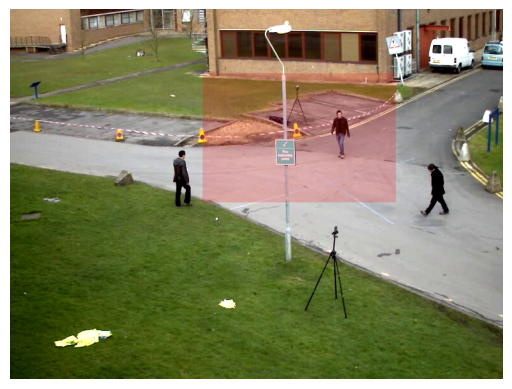

In [ ]:
import matplotlib.pyplot as plt

# 동영상 파일 열기
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    print("Video file opened successfully.")

ret, frame = cap.read()
if ret:
    (x, y, w, h) = (400, 200, 300, 200)

    overlay = frame.copy()
    output = frame.copy()
    cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 0, 255), -100)

    alpha = 0.2
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    frame_with_detections = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    # 프레임을 이미지로 표시
    plt.imshow(frame_with_detections)
    plt.axis('off')
    plt.show()
else:
    print("Error: Could not read the first frame.")

cap.release()

# 우리의 관심 영역 = 영역 안에서 탐지된 이벤트만 처리
# (x, y, w, h) = (400, 200, 300, 200)

In [ ]:
# 동영상 파일 열기
cap = cv2.VideoCapture(video_path)
region = (300, 100, 300, 200)

# 비디오 라이터 설정 (처리된 비디오를 저장하기 위해)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정
out = cv2.VideoWriter(output_path, fourcc, 20.0, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # 프레임에서 보행자 탐지
    frame_with_detections = detect_pedestrians_in_region(frame, region)

    # 처리된 프레임을 비디오 파일로 저장
    out.write(frame_with_detections)

cap.release()
out.release()


# 드라이브에 저장된 output_video.mp4 파일을 다운로드 후 재생해 보세요!